In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Problem 1: 
<b>You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.</b>

<b>1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. </b>

In [2]:
df=pd.read_excel("Election_Data.xlsx","Election_Dataset_Two Classes")

In [3]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
df.drop(df.columns[0],axis=1, inplace=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [6]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


<b>1.2. Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers. Interpret the inferences for each </b>

In [7]:
df.shape

(1525, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df.duplicated().sum()

8

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
iqr = Q3-Q1
iqr

age                        26.0
economic.cond.national      1.0
economic.cond.household     1.0
Blair                       2.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

In [12]:
outliers = (df<(Q1-1.5*iqr))|(df>(Q3+1.5*iqr))
print('The below list shows the number of outliers present in each columns:')
outliers.sum()

The below list shows the number of outliers present in each columns:


Blair                       0
Europe                      0
Hague                       0
age                         0
economic.cond.household    65
economic.cond.national     37
gender                      0
political.knowledge         0
vote                        0
dtype: int64

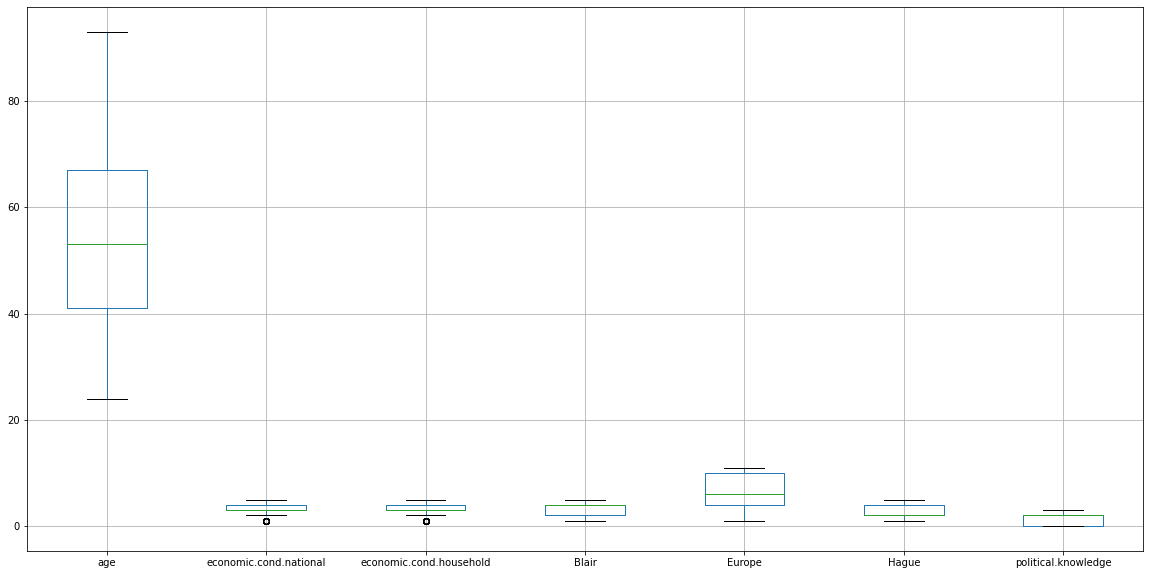

In [13]:
plt.figure(figsize=(20,10))
df[['age','economic.cond.national','economic.cond.household','Blair','Europe','Hague','gender','political.knowledge','vote']].boxplot()
plt.show()

In [14]:
cor = df.corr()
cor

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


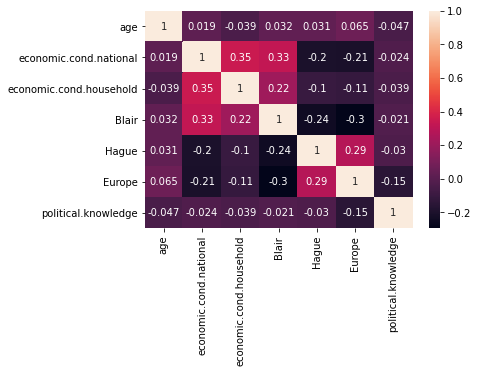

In [15]:
sns.heatmap(cor,annot=True)

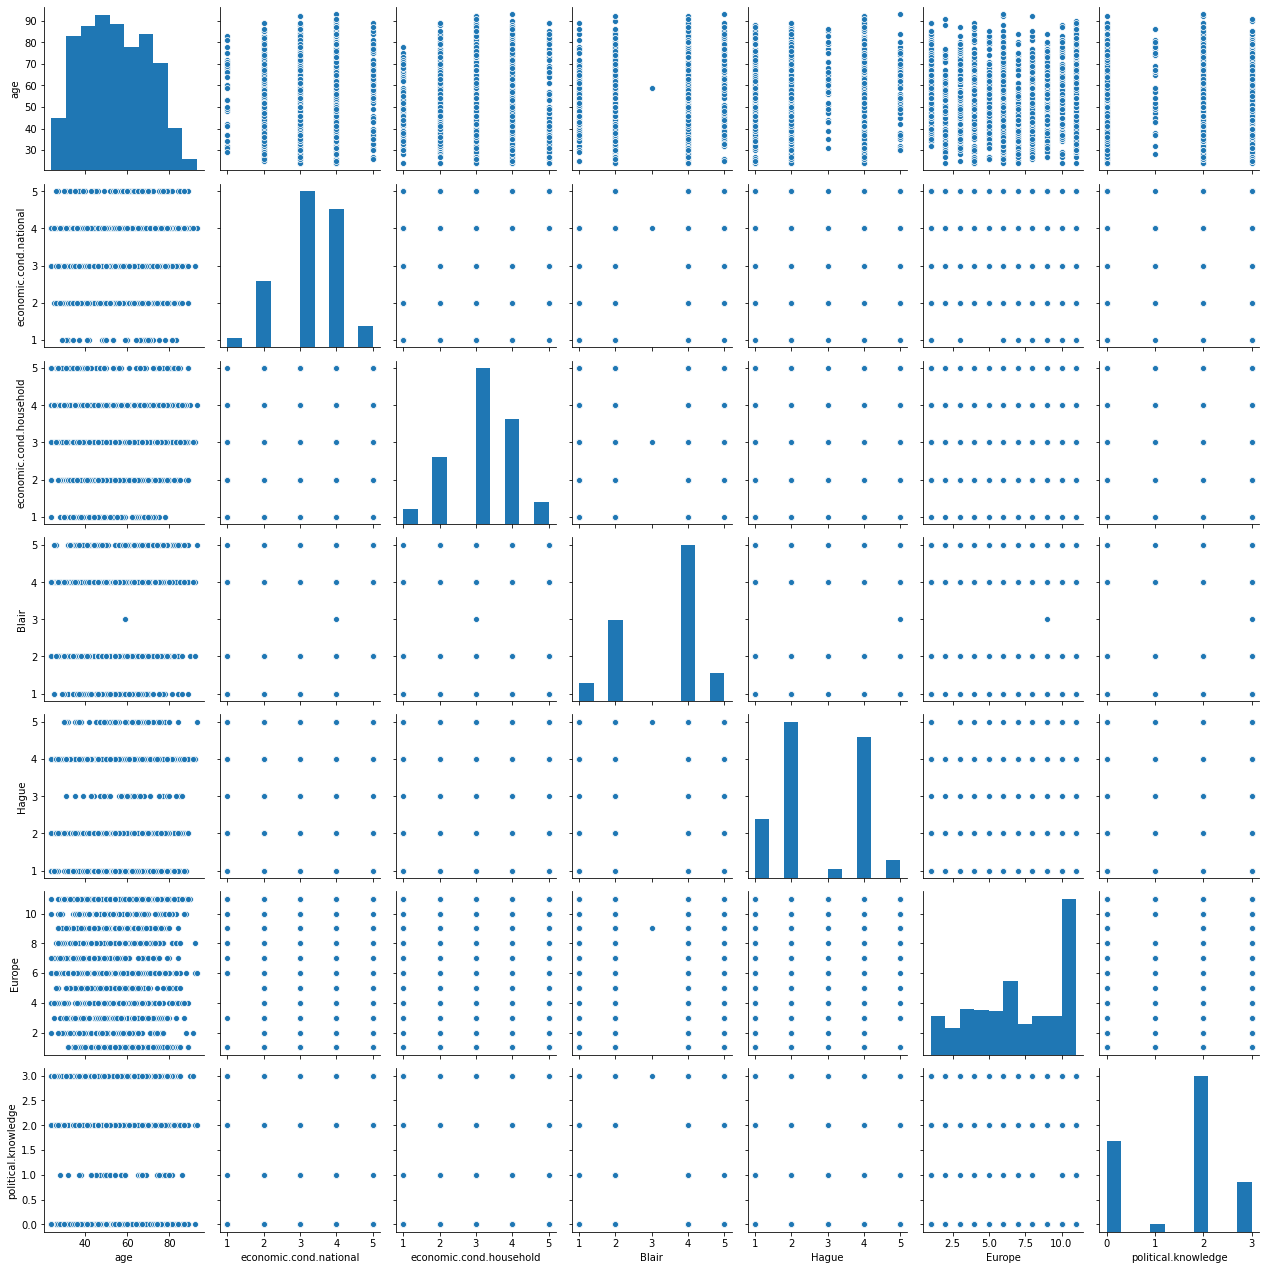

In [16]:
sns.pairplot(df)

<b>1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?, Data Split: Split the data into train and test (70:30).</b>

In [17]:
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [18]:
df['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [19]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   category
 1   age                      1517 non-null   int64   
 2   economic.cond.national   1517 non-null   int64   
 3   economic.cond.household  1517 non-null   int64   
 4   Blair                    1517 non-null   int64   
 5   Hague                    1517 non-null   int64   
 6   Europe                   1517 non-null   int64   
 7   political.knowledge      1517 non-null   int64   
 8   gender                   1517 non-null   category
dtypes: category(2), int64(7)
memory usage: 138.0 KB


In [21]:
replace_struct ={ "vote": {"Labour": 0, "Conservative": 1}}
oneHotCols=["gender"]

In [22]:
df=df.replace(replace_struct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_female,gender_male
0,0,43,3,3,4,1,2,2,1,0
1,0,36,4,4,4,4,5,2,0,1
2,0,35,4,4,5,2,3,2,0,1
3,0,24,4,2,2,1,4,0,1,0
4,0,41,2,2,1,1,6,2,0,1
5,0,47,3,4,4,4,4,2,0,1
6,0,57,2,2,4,4,11,2,0,1
7,0,77,3,4,4,1,1,0,0,1
8,0,39,3,3,4,4,11,0,1,0
9,0,70,3,2,5,1,11,2,0,1


In [23]:
df.shape

(1517, 10)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender_female            1517 non-null   uint8
 9   gender_male              1517 non-null   uint8
dtypes: int64(8), uint8(2)
memory usage: 109.6 KB


In [25]:
X = df.drop("vote" , axis=1)
y = df.pop("vote")

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [27]:
y_train.value_counts(1)

0    0.71065
1    0.28935
Name: vote, dtype: float64

In [28]:
y_test.value_counts(1)

0    0.664474
1    0.335526
Name: vote, dtype: float64

In [29]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

<b>1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models.</b>

1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict1 = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)

0.8289473684210527


In [32]:
y_predict = model.predict(X_train_scaled)
model_score1 = model.score(X_train_scaled, y_train)
print(model_score1)

0.8312912346842601


2. LDA

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train_scaled,y_train)

In [35]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train_scaled)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test_scaled)

<b>1.5) Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model.</b>

1. KNN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' )

In [38]:
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [39]:
predicted_labels1 = NNH.predict(X_test_scaled)
NNH.score(X_test_scaled, y_test)

0.8289473684210527

In [40]:
predicted_labels = NNH.predict(X_train_scaled)
NNH.score(X_train_scaled, y_train)

1.0

2.Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model3 = GaussianNB()

model3.fit(X_train_scaled, y_train.ravel())

GaussianNB()

In [42]:
train_predict = model3.predict(X_train_scaled)
test_predict = model3.predict(X_test_scaled)
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))

Model Accuracy: 0.8294


<b>1.6) Model Tuning , Bagging and Boosting.</b>

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=1)

In [45]:
from sklearn import tree

In [46]:
train_char_label = ['No', 'Yes']
Tree_File = open('election_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Tree_File, feature_names = list(X_train_scaled), class_names = list(train_char_label))
Tree_File.close()

In [47]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns))

                              Imp
age                      0.205558
economic.cond.national   0.106117
economic.cond.household  0.087117
Blair                    0.123733
Hague                    0.226219
Europe                   0.144569
political.knowledge      0.065871
gender_female            0.027655
gender_male              0.013161


In [48]:
print(dTree.score(X_train_scaled, y_train))
print(dTree.score(X_test_scaled, y_test))

1.0
0.8004385964912281


In [49]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [50]:
print(reg_dt_model.score(X_train_scaled, y_train))
print(reg_dt_model.score(X_test_scaled, y_test))

0.8614514608859567
0.8135964912280702


<b>Bagging</b>

In [51]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=reg_dt_model, n_estimators=100,random_state=1)

bgcl = bgcl.fit(X_train_scaled, y_train)

In [52]:
bgcl_predict_test = bgcl.predict(X_test_scaled)
bgcl_predict_train = bgcl.predict(X_train_scaled)
print(bgcl.score(X_test_scaled , y_test))

0.8223684210526315


<b>AdaBoost</b>

In [53]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train_scaled, y_train)
abcl_predict_test = abcl.predict(X_test_scaled)
print("Train:",abcl.score(X_train_scaled , y_train))
print("Test:",abcl.score(X_test_scaled , y_test))

Train: 0.8463713477851084
Test: 0.8179824561403509


In [54]:
abcl = AdaBoostClassifier(n_estimators=20, random_state=1)
abcl = abcl.fit(X_train_scaled, y_train)
abcl_predict_test = abcl.predict(X_test_scaled)
abcl_predict_train = abcl.predict(X_train_scaled)
print("Train:",abcl.score(X_train_scaled , y_train))
print("Test:",abcl.score(X_test_scaled , y_test))

Train: 0.8435438265786993
Test: 0.8201754385964912


<b>GradientBoost</b>

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_scaled, y_train)
gbcl_predict_test = gbcl.predict(X_test_scaled)
gbcl_predict_train = gbcl.predict(X_train_scaled)
print(gbcl.score(X_test_scaled, y_test))

0.8289473684210527


<b>1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized.</b>

<b>1.Logistic regression</b>

In [56]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.8312912346842601
0.8289473684210527


In [57]:
metrics.confusion_matrix(y_test, y_predict1)

array([[276,  27],
       [ 51, 102]], dtype=int64)

In [58]:
metrics.confusion_matrix(y_train, y_predict)

array([[686,  68],
       [111, 196]], dtype=int64)

AUC: 0.890


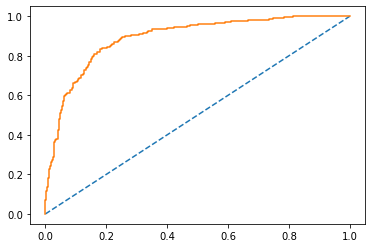

In [59]:
probs = model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.884


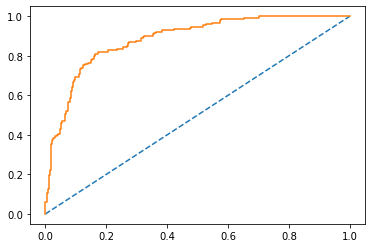

In [60]:
probs = model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [61]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.82       456



In [62]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



<b>2.LDA </b>

In [63]:
print(model1.score(X_train_scaled, y_train))
print(model1.score(X_test_scaled, y_test))

0.8341187558906692
0.831140350877193


In [64]:
metrics.confusion_matrix(y_train, pred_class_train)

array([[685,  69],
       [107, 200]], dtype=int64)

In [65]:
metrics.confusion_matrix(y_test, pred_class_test)

array([[274,  29],
       [ 48, 105]], dtype=int64)

AUC: 0.889


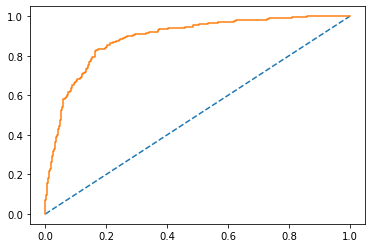

In [66]:
probs = model1.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.889


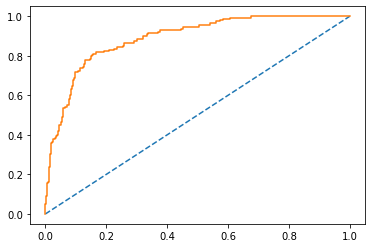

In [67]:
probs = model1.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<b>3.KNN</b>

In [68]:
print(NNH.score(X_train_scaled, y_train))
print(NNH.score(X_test_scaled, y_test))

1.0
0.8289473684210527


In [69]:
metrics.confusion_matrix(y_train, predicted_labels)

array([[754,   0],
       [  0, 307]], dtype=int64)

AUC: 1.000


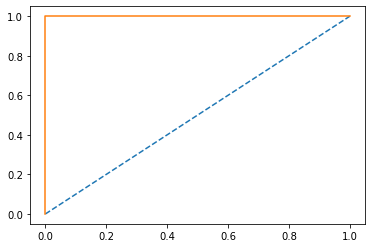

In [70]:
probs = NNH.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [71]:
metrics.confusion_matrix(y_test, predicted_labels1)

array([[275,  28],
       [ 50, 103]], dtype=int64)

AUC: 0.886


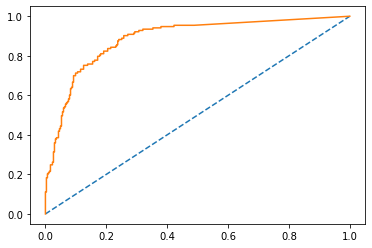

In [72]:
probs = NNH.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<b>4.Naive Bayes</b>

In [73]:
print(metrics.accuracy_score(y_train, train_predict))
print(metrics.accuracy_score(y_test, test_predict))

0.8294062205466541
0.8223684210526315


In [74]:
metrics.confusion_matrix(y_train, train_predict)

array([[668,  86],
       [ 95, 212]], dtype=int64)

In [75]:
metrics.confusion_matrix(y_test, test_predict)

array([[268,  35],
       [ 46, 107]], dtype=int64)

In [76]:
print(metrics.classification_report(y_train, train_predict))
print(metrics.classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       754
           1       0.71      0.69      0.70       307

    accuracy                           0.83      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.83      0.83      0.83      1061

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.75      0.70      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


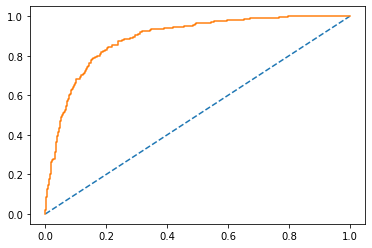

In [77]:
probs = model3.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.877


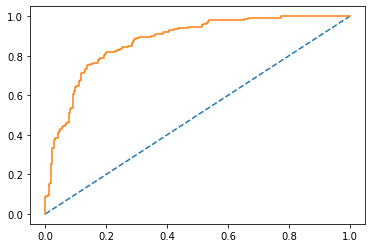

In [78]:
probs = model3.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<b>5.Bagging</b>

In [79]:
print(bgcl.score(X_train_scaled, y_train))
print(bgcl.score(X_test_scaled, y_test))

0.8557964184731386
0.8223684210526315


In [80]:
print("Train:")
print(metrics.confusion_matrix(y_train, bgcl_predict_train))
print(" ")
print("Test:")
print(metrics.confusion_matrix(y_test, bgcl_predict_test))

Train:
[[697  57]
 [ 96 211]]
 
Test:
[[274  29]
 [ 52 101]]


AUC: 0.926


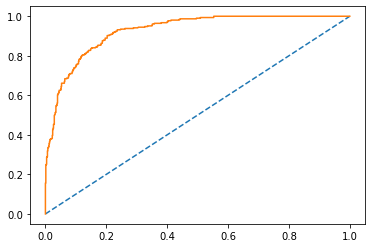

In [81]:
probs = bgcl.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.887


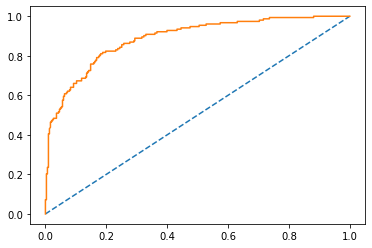

In [82]:
probs = bgcl.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<b>6.AdaBoost</b>

In [83]:
print(abcl.score(X_train_scaled, y_train))
print(abcl.score(X_test_scaled, y_test))

0.8435438265786993
0.8201754385964912


In [84]:
print("Train:")
print(metrics.confusion_matrix(y_train, abcl_predict_train))
print(" ")
print("Test:")
print(metrics.confusion_matrix(y_test, abcl_predict_test))

Train:
[[687  67]
 [ 99 208]]
 
Test:
[[266  37]
 [ 45 108]]


AUC: 0.905


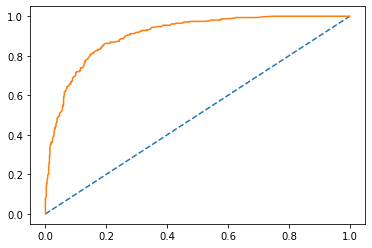

In [85]:
probs = abcl.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.879


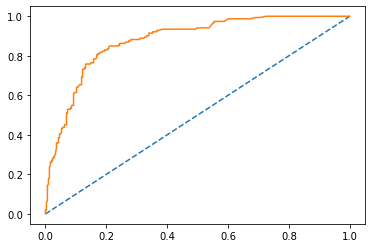

In [86]:
probs = abcl.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<b>7.Gradient Boosting</b>

In [87]:
print(gbcl.score(X_train_scaled, y_train))
print(gbcl.score(X_test_scaled, y_test))

0.8803016022620169
0.8289473684210527


In [88]:
print("Train:")
print(metrics.confusion_matrix(y_train, gbcl_predict_train))
print(" ")
print("Test:")
print(metrics.confusion_matrix(y_test, gbcl_predict_test))

Train:
[[708  46]
 [ 81 226]]
 
Test:
[[275  28]
 [ 50 103]]


AUC: 0.935


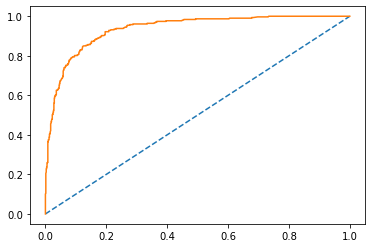

In [89]:
probs = gbcl.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.898


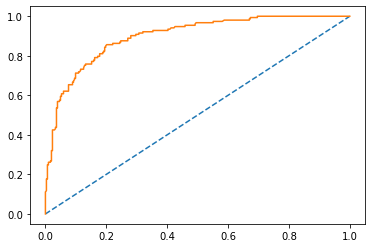

In [90]:
probs = gbcl.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

<b>SMOTE</b>

In [91]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [92]:
counter=Counter(y_train)
counter

Counter({1: 307, 0: 754})

In [93]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [94]:
counter=Counter(y_train)
counter

Counter({1: 754, 0: 754})

In [95]:
X_train_scaled  = X_train.apply(zscore)

In [96]:
model4 = LogisticRegression()
model4.fit(X_train_scaled, y_train)
linear_predict = model4.predict(X_test_scaled)
linear_predict1 = model4.predict(X_train_scaled)
test_score = model4.score(X_test_scaled, y_test)
train_score= model4.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  0.8507957559681698
Test score:  0.756578947368421


In [97]:
model5=clf.fit(X_train_scaled,y_train)
LDA_predict = model5.predict(X_test_scaled)
LDA_predict1 = model5.predict(X_train_scaled)
test_score = model5.score(X_test_scaled, y_test)
train_score= model5.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  0.8481432360742706
Test score:  0.7828947368421053


In [98]:
model6=NNH.fit(X_train_scaled, y_train)
KNN_predict = model6.predict(X_test_scaled)
KNN_predict1 = model6.predict(X_train_scaled)
test_score = model6.score(X_test_scaled, y_test)
train_score= model6.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  1.0
Test score:  0.8135964912280702


In [99]:
model7 = GaussianNB()
model7.fit(X_train_scaled, y_train.ravel())
NB_predict = model7.predict(X_test_scaled)
NB_predict1 = model7.predict(X_train_scaled)
test_score = model7.score(X_test_scaled, y_test)
train_score= model7.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  0.8375331564986738
Test score:  0.7872807017543859


In [100]:
reg_dt_model.fit(X_train_scaled, y_train)
model8 = bgcl.fit(X_train_scaled, y_train)
bagging_predict = model8.predict(X_test_scaled)
bagging_predict1= model8.predict(X_train_scaled)
test_score = model8.score(X_test_scaled, y_test)
train_score= model8.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  0.8713527851458885
Test score:  0.7916666666666666


In [101]:
abcl = AdaBoostClassifier(n_estimators=20, random_state=1)
model9 = abcl.fit(X_train_scaled, y_train)
adaBoost_predict = model9.predict(X_test_scaled)
adaBoost_predict1= model9.predict(X_train_scaled)
test_score = model9.score(X_test_scaled, y_test)
train_score= model9.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  0.8574270557029178
Test score:  0.8026315789473685


In [102]:
gbcl = GradientBoostingClassifier(n_estimators = 30,random_state=1)
model10 = gbcl.fit(X_train_scaled, y_train)
gbcl_predict = model10.predict(X_test_scaled)
gbcl_predict1= model10.predict(X_train_scaled)
test_score = model10.score(X_test_scaled, y_test)
train_score= model10.score(X_train_scaled, y_train)
print("Train score: ",train_score)
print("Test score: ",test_score)

Train score:  0.8759946949602122
Test score:  0.8135964912280702


# Problem 2:

<b>In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941<br>
President John F. Kennedy in 1961<br>
President Richard Nixon in 1973</b>

In [103]:
import nltk
import re
import random
import string

In [104]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karthika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt=inaugural.raw('1941-Roosevelt.txt')
Kennedy=inaugural.raw('1961-Kennedy.txt')
Nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\karthika\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


<b>2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)</b>

In [106]:
print("Number of characters in the documents:")
print("Roosevelt: ",len(Roosevelt))
print("Kennedy: ",len(Kennedy))
print("Nixon: ",len(Nixon))

Number of characters in the documents:
Roosevelt:  7571
Kennedy:  7618
Nixon:  9991


In [107]:
print("Number of words in the documents:")
print("Roosevelt: ",len(Roosevelt.split()))
print("Kennedy: ",len(Kennedy.split()))
print("Nixon: ",len(Nixon.split()))

Number of words in the documents:
Roosevelt:  1360
Kennedy:  1390
Nixon:  1819


In [108]:
print("Number of sentences in the documents:")
print("Roosevelt: ",len(sent_tokenize(Roosevelt)))
print("Kennedy: ",len(sent_tokenize(Kennedy)))
print("Nixon: ",len(sent_tokenize(Nixon)))

Number of sentences in the documents:
Roosevelt:  68
Kennedy:  52
Nixon:  68


<b>2.2) Remove all the stopwords from the three speeches.</b>

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karthika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
from nltk.tokenize import word_tokenize

In [111]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [112]:
text_tokens1 = word_tokenize(Roosevelt.lower())
#text_tokens1 = [st.stem(word) for word in text_tokens1]
all_words_clean1 = [word for word in text_tokens1 if word not in stopwords]
print(all_words_clean1)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', "'s", 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three-score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future',

In [113]:
stopwords.extend(["--","'s","``","''"])

In [114]:
all_words_clean1 = [word for word in text_tokens1 if word not in stopwords]
print(all_words_clean1)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three-score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', 'freedom', 'ebbin

In [115]:
text_tokens2 = word_tokenize(Kennedy.lower())
all_words_clean2 = [word for word in text_tokens2 if word not in stopwords]

In [116]:
text_tokens3 = word_tokenize(Nixon.lower())
all_words_clean3 = [word for word in text_tokens3 if word not in stopwords]

<b>2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)</b>

In [117]:
print("Most common words in inaugural address of president Roosevelt:")
nltk.FreqDist(all_words_clean1).most_common(3)

Most common words in inaugural address of president Roosevelt:


[('nation', 12), ('know', 10), ('spirit', 9)]

In [118]:
print("Most common words in inaugural address of president Kennedy:")
nltk.FreqDist(all_words_clean2).most_common(3)

Most common words in inaugural address of president Kennedy:


[('let', 16), ('us', 12), ('world', 8)]

In [119]:
print("Most common words in inaugural address of president Nixon:")
nltk.FreqDist(all_words_clean3).most_common(3)

Most common words in inaugural address of president Nixon:


[('us', 26), ('let', 22), ('america', 21)]

<b>2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)</b>

In [120]:
!pip install WordCloud

In [121]:
from wordcloud import WordCloud

In [122]:
inaugural1 = ' '.join(all_words_clean1)
inaugural2 = ' '.join(all_words_clean2)
inaugural3 = ' '.join(all_words_clean3)

Word cloud of inaugural address of president Roosevelt:


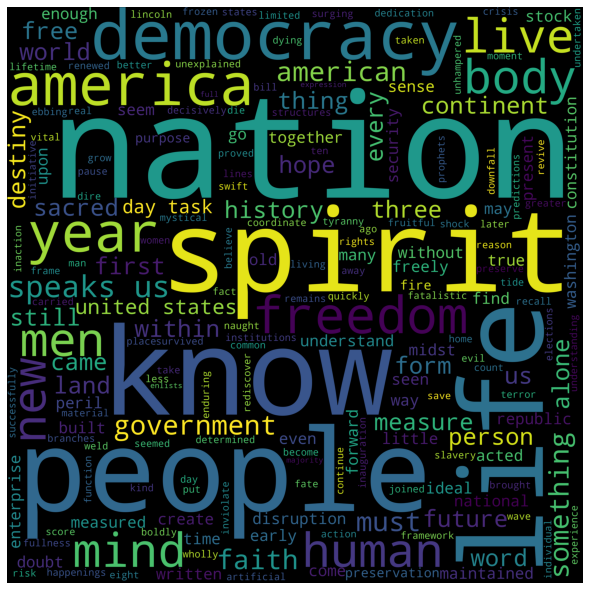

In [123]:
print("Word cloud of inaugural address of president Roosevelt:")
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(inaugural1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()

Word cloud of inaugural address of president Kennedy:


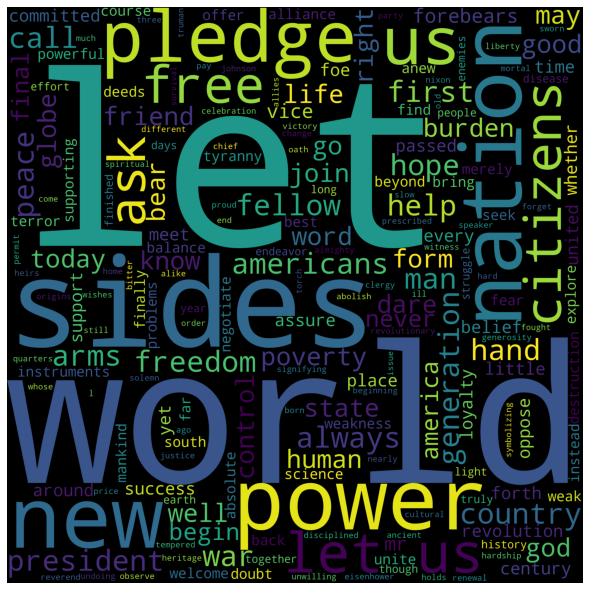

In [124]:
print("Word cloud of inaugural address of president Kennedy:")
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(inaugural2) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()

Word cloud of inaugural address of president Nixon:


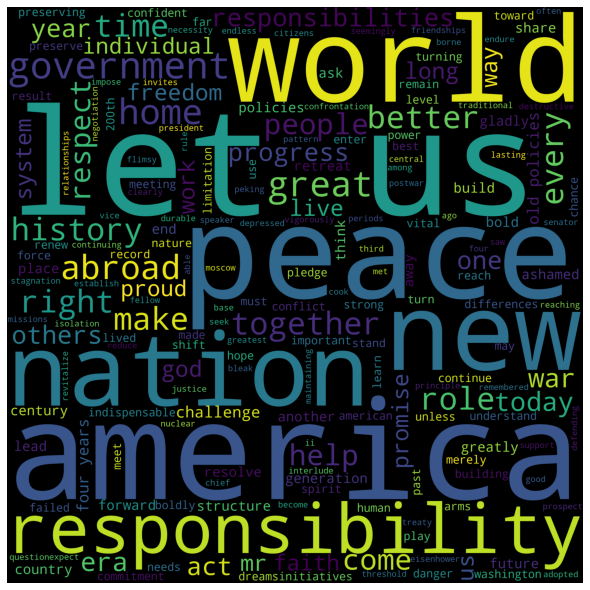

In [125]:
print("Word cloud of inaugural address of president Nixon:")
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(inaugural3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 
plt.show()